In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/risha/Documents/Healthcare-Triage-Assistant/data/raw/synthetic_medical_triage.csv")
df.head()

,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,arrival_mode,triage_level
0,17.9,95.4,147.1,97.4,36.48,1,0,0,walk_in,0
1,79.2,147.9,158.6,96.0,39.35,10,4,2,ambulance,3
2,51.1,87.1,128.2,98.5,37.74,5,2,2,walk_in,1
3,56.8,84.7,147.2,92.5,37.55,4,4,4,walk_in,1
4,39.2,58.0,107.8,99.0,36.26,2,1,1,walk_in,0


In [3]:
df.isnull().sum()

age                        0
heart_rate                 0
systolic_blood_pressure    0
oxygen_saturation          0
body_temperature           0
pain_level                 0
chronic_disease_count      0
previous_er_visits         0
arrival_mode               0
triage_level               0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

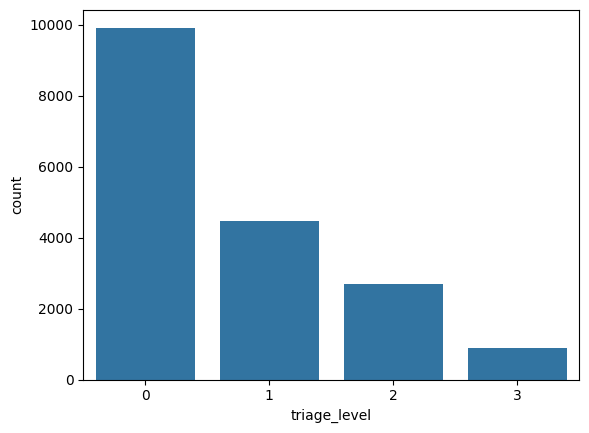

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="triage_level", data=df)
plt.show()

In [6]:
df.describe()

,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,triage_level
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,44.716244,83.292322,128.072739,96.085183,37.224236,3.402111,1.072611,1.265056,0.697722
std,19.101056,16.964405,18.813277,3.330830,0.914978,2.039249,1.312204,1.454887,0.898923
min,0.000000,33.400000,65.800000,79.500000,34.470000,1.000000,0.000000,0.000000,0.000000
25%,31.200000,71.500000,114.900000,94.300000,36.580000,2.000000,0.000000,0.000000,0.000000
50%,44.000000,81.600000,126.900000,96.600000,37.120000,3.000000,1.000000,1.000000,0.000000
75%,57.500000,93.200000,139.900000,98.700000,37.770000,5.000000,2.000000,2.000000,1.000000
max,95.000000,152.300000,219.700000,100.000000,41.130000,10.000000,10.000000,11.000000,3.000000


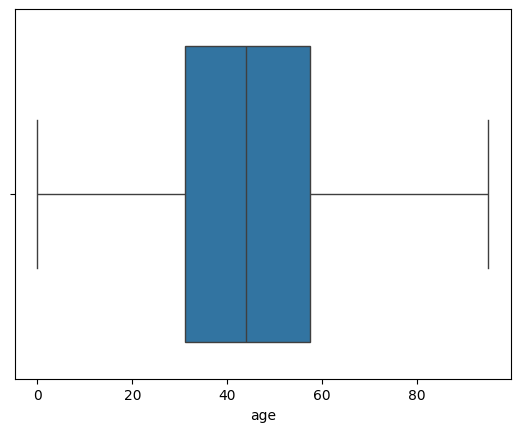

In [7]:
sns.boxplot(x=df["age"])
plt.show()

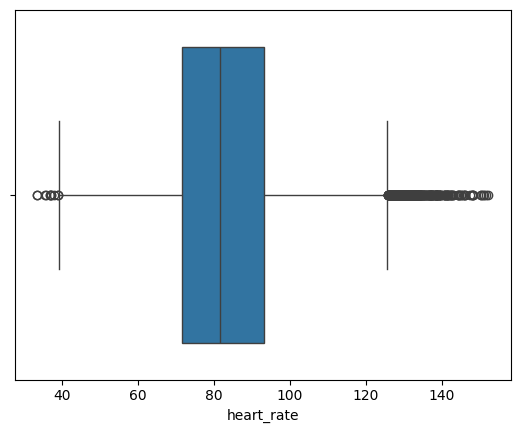

In [8]:
sns.boxplot(x=df["heart_rate"])
plt.show()

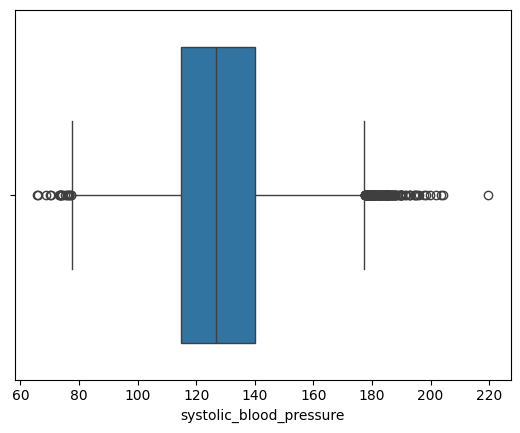

In [9]:
sns.boxplot(x=df["systolic_blood_pressure"])
plt.show()

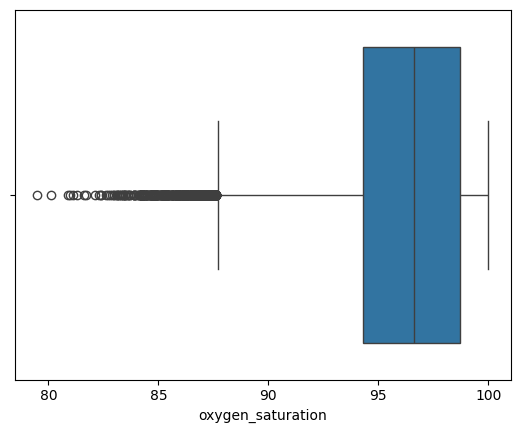

In [10]:
sns.boxplot(x=df["oxygen_saturation"])
plt.show()

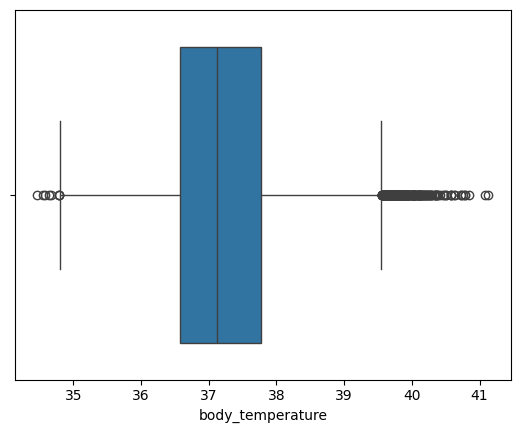

In [11]:
sns.boxplot(x=df["body_temperature"])
plt.show()

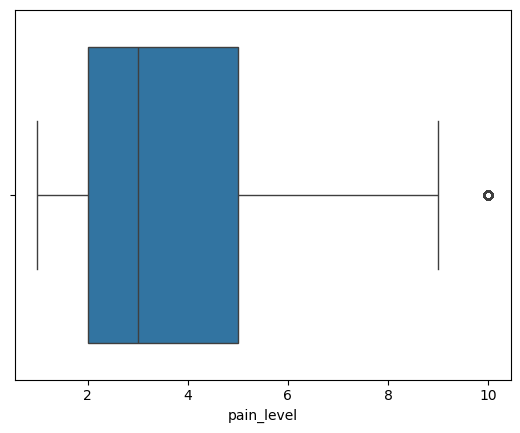

In [12]:
sns.boxplot(x=df["pain_level"])
plt.show()

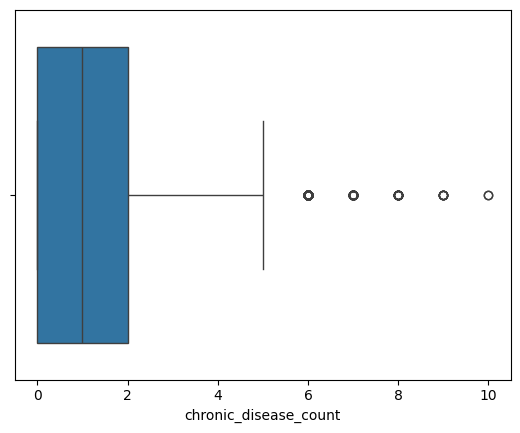

In [13]:
sns.boxplot(x=df["chronic_disease_count"])
plt.show()

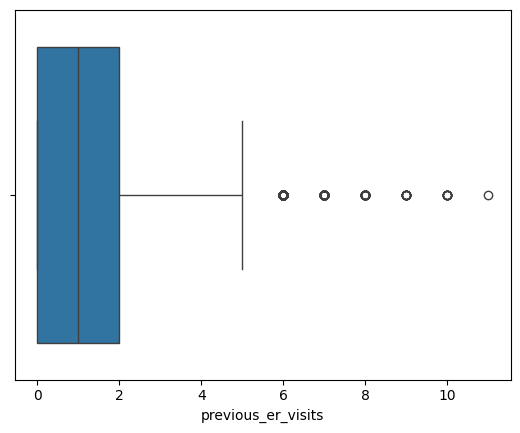

In [14]:
sns.boxplot(x=df["previous_er_visits"])
plt.show()

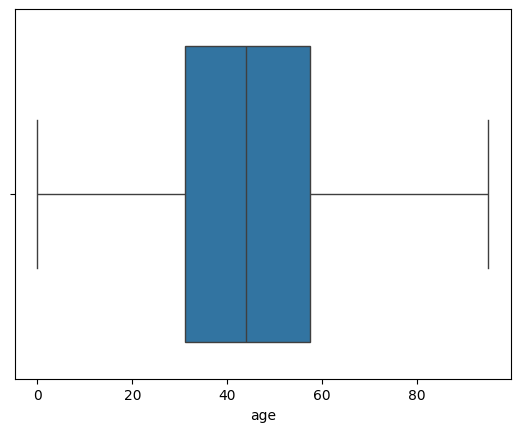

In [15]:
sns.boxplot(x=df["age"])
plt.show()

In [16]:
df["arrival_mode"].unique()

array(['walk_in', 'ambulance', 'wheelchair'], dtype=object)

In [17]:
df_encoded = pd.get_dummies(df, columns=["arrival_mode"], drop_first=False)
df_encoded.head()

,age,heart_rate,systolic_blood_pressure,oxygen_saturation,body_temperature,pain_level,chronic_disease_count,previous_er_visits,triage_level,arrival_mode_ambulance,arrival_mode_walk_in,arrival_mode_wheelchair
0,17.9,95.4,147.1,97.4,36.48,1,0,0,0,False,True,False
1,79.2,147.9,158.6,96.0,39.35,10,4,2,3,True,False,False
2,51.1,87.1,128.2,98.5,37.74,5,2,2,1,False,True,False
3,56.8,84.7,147.2,92.5,37.55,4,4,4,1,False,True,False
4,39.2,58.0,107.8,99.0,36.26,2,1,1,0,False,True,False


In [18]:
X = df_encoded.drop("triage_level", axis=1)
y = df_encoded["triage_level"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1985
           1       0.89      0.88      0.89       897
           2       0.93      0.89      0.91       540
           3       0.97      0.94      0.95       178

    accuracy                           0.94      3600
   macro avg       0.94      0.92      0.93      3600
weighted avg       0.94      0.94      0.94      3600



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring="f1_macro")
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [22]:
import joblib
joblib.dump(model, "C:/Users/risha/Documents/Healthcare-Triage-Assistant/src/model.pkl")

['C:/Users/risha/Documents/Healthcare-Triage-Assistant/src/model.pkl']